In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [4]:
df = pd.read_csv(r'C:\Users\Roshni\RMPS & Co\RMP.ai - AiExtensive\Ai Extensive\Ecom BI\Payments\Amazon payment.csv')
df.head(2)

,date/time,settlement id\n,type\n,order id,Sku,description\n,quantity,marketplace\n,account type,fulfillment,...,Total sales tax liable(GST before adjusting TCS),TCS-CGST,TCS-SGST,TCS-IGST,TDS (Section 194-O),selling fees\n,fba fees\n,other transaction fees\n,other\n,total\n
0,01-Jan-2024 8:15:20 am UTC,21378118742,Shipping Services\n,407-5049432-4392339,NaN,Easy Ship weight handling fees,NaN,Amazon.in,Cash On Delivery Transactions and Non-Transact...,Merchant,...,0.0,0.0,0.0,0.00,0.00,0.00,0,-67.85,0.0,-67.85
1,01-Jan-2024 8:30:00 am UTC,21378118742,Order\n,407-5049432-4392339,Marvel 17_Grey,AA-HA!! Women's Organza Silk Woven Saree with ...,1.0,amazon.in,Cash On Delivery Transactions and Non-Transact...,Merchant,...,63.1,0.0,0.0,-12.62,-12.62,-343.97,0,-68.44,0.0,887.35


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   date/time                                         77 non-null     object 
 1   settlement id
                                    77 non-null     int64  
 2   type
                                             77 non-null     object 
 3   order id                                          58 non-null     object 
 4   Sku                                               35 non-null     object 
 5   description
                                      77 non-null     object 
 6   quantity                                          35 non-null     float64
 7   marketplace
                                      59 non-null     object 
 8   account type                                      77 non-null     object 
 9   fulfillment            

DATA CLEANING

In [7]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Standardizing column names by replacing spaces and special characters with underscores
df.columns = df.columns.str.replace('[^A-Za-z0-9]+', '_', regex=True)

# Checking and converting date/time column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Handling missing values:
# 1. Dropping rows with all missing values
df.dropna(how='all', inplace=True)

# 2. Filling missing numerical values with 0, as it may indicate no transaction or fee
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# 3. For categorical columns, filling with 'Unknown' for analysis purposes
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Display cleaned data information and a sample
df.info()
df.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype              
---  ------                                            --------------  -----              
 0   date_time                                         62 non-null     datetime64[ns, UTC]
 1   settlement_id                                     77 non-null     int64              
 2   type                                              77 non-null     object             
 3   order_id                                          77 non-null     object             
 4   Sku                                               77 non-null     object             
 5   description                                       77 non-null     object             
 6   quantity                                          77 non-null     float64            
 7   marketplace                                       77 non-null     object 

,date_time,settlement_id,type,order_id,Sku,description,quantity,marketplace,account_type,fulfillment,...,Total_sales_tax_liable_GST_before_adjusting_TCS_,TCS_CGST,TCS_SGST,TCS_IGST,TDS_Section_194_O_,selling_fees,fba_fees,other_transaction_fees,other,total
0,2024-01-01 08:15:20+00:00,21378118742,Shipping Services\n,407-5049432-4392339,Unknown,Easy Ship weight handling fees,0.0,Amazon.in,Cash On Delivery Transactions and Non-Transact...,Merchant,...,0.0,0.0,0.0,0.00,0.00,0.00,0,-67.85,0.0,-67.85
1,2024-01-01 08:30:00+00:00,21378118742,Order\n,407-5049432-4392339,Marvel 17_Grey,AA-HA!! Women's Organza Silk Woven Saree with ...,1.0,amazon.in,Cash On Delivery Transactions and Non-Transact...,Merchant,...,63.1,0.0,0.0,-12.62,-12.62,-343.97,0,-68.44,0.0,887.35


DATA ANALYSIS

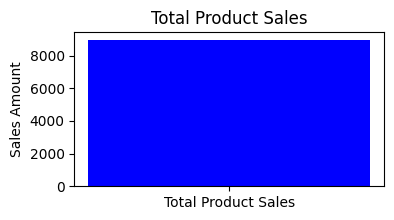

np.float64(8974.289999999999)

In [10]:
# Total Product Sales
total_product_sales = df['product_sales'].sum()

plt.figure(figsize=(4, 2))
plt.bar(['Total Product Sales'], [total_product_sales], color='blue')
plt.title('Total Product Sales')
plt.ylabel('Sales Amount')
plt.show()
total_product_sales

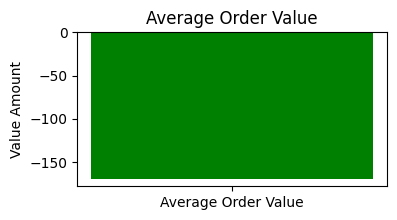

np.float64(-169.5096551724139)

In [12]:
# Average Order Value
total_orders = df['order_id'].nunique()

# Calculating total sales (excluding refunds and other adjustments)
total_sales = df['total'].sum()

average_order_value = total_sales / total_orders

plt.figure(figsize=(4, 2))
plt.bar(['Average Order Value'], [average_order_value], color='green')
plt.title('Average Order Value')
plt.ylabel('Value Amount')
plt.show()

average_order_value

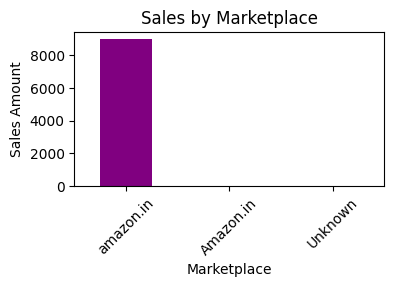

marketplace
amazon.in    8974.29
Amazon.in       0.00
Unknown         0.00
Name: product_sales, dtype: float64

In [17]:
# Sales by Marketplace
# Grouping sales by marketplace
sales_by_marketplace = df.groupby('marketplace')['product_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(4, 2))
sales_by_marketplace.plot(kind='bar', color='purple')
plt.title('Sales by Marketplace')
plt.xlabel('Marketplace')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

# Analysis
sales_by_marketplace

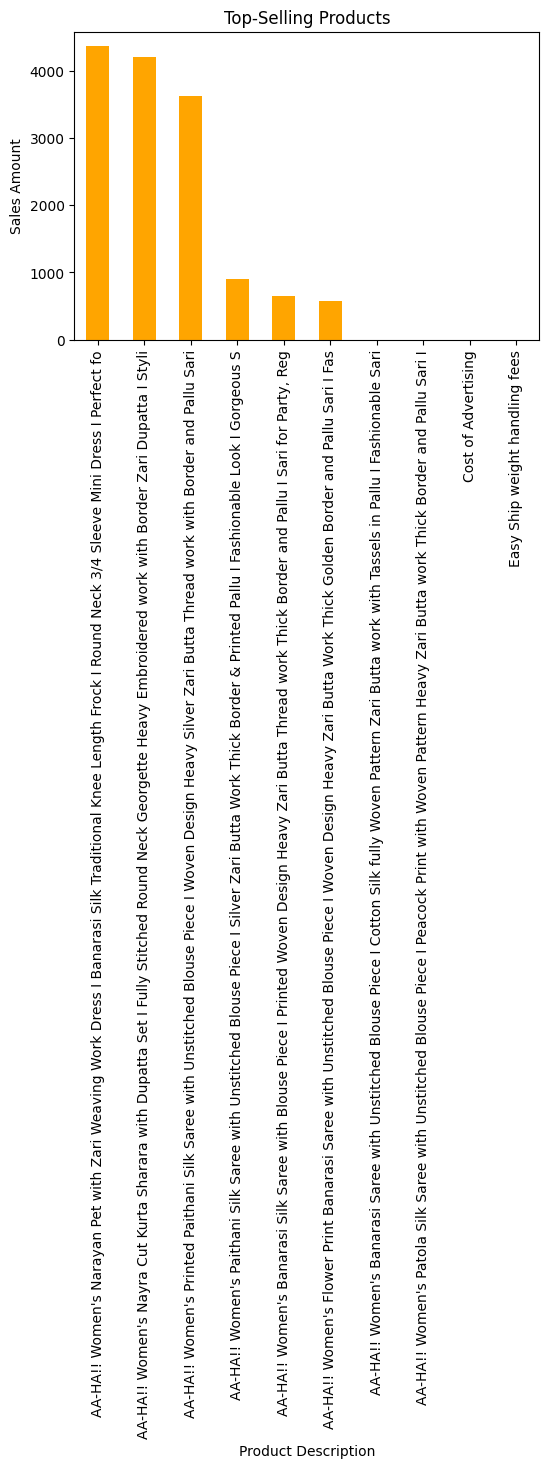

description
AA-HA!! Women's Narayan Pet with Zari Weaving Work Dress I Banarasi Silk Traditional Knee Length Frock I Round Neck 3/4 Sleeve Mini Dress I Perfect fo    4361.90
AA-HA!! Women's Nayra Cut Kurta Sharara with Dupatta Set I Fully Stitched Round Neck Georgette Heavy Embroidered work with Border Zari Dupatta I Styli    4200.00
AA-HA!! Women's Printed Paithani Silk Saree with Unstitched Blouse Piece I Woven Design Heavy Silver Zari Butta Thread work with Border and Pallu Sari    3619.04
AA-HA!! Women's Paithani Silk Saree with Unstitched Blouse Piece I Silver Zari Butta Work Thick Border & Printed Pallu I Fashionable Look I Gorgeous S     894.29
AA-HA!! Women's Banarasi Silk Saree with Blouse Piece I Printed Woven Design Heavy Zari Butta Thread work Thick Border and Pallu I Sari for Party, Reg     646.67
AA-HA!! Women's Flower Print Banarasi Saree with Unstitched Blouse Piece I Woven Design Heavy Zari Butta Work Thick Golden Border and Pallu Sari I Fas     580.00
AA-HA!! Women's 

In [18]:
# Top Selling Products
# Grouping sales by product description
top_selling_products = df.groupby('description')['product_sales'].sum().sort_values(ascending=False).head(10)

# Plotting top-selling products
plt.figure(figsize=(6, 4))
top_selling_products.plot(kind='bar', color='orange')
plt.title('Top-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90)
plt.show()

# Analysis
top_selling_products

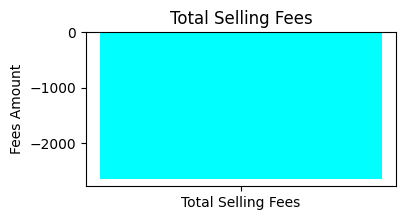

np.float64(-2640.8199999999993)

In [21]:
# Total Selling Fees
total_selling_fees = df['selling_fees'].sum()

plt.figure(figsize=(4, 2))
plt.bar(['Total Selling Fees'], [total_selling_fees], color='cyan')
plt.title('Total Selling Fees')
plt.ylabel('Fees Amount')
plt.show()

# Analysis
total_selling_fees

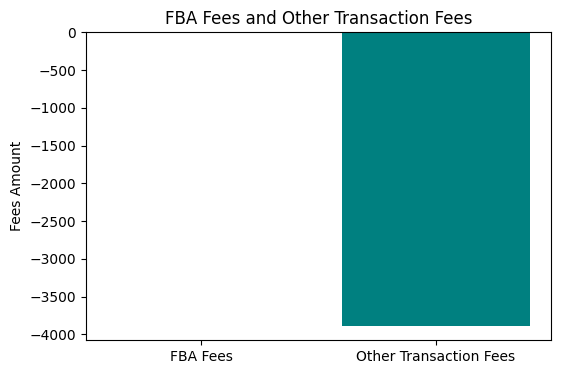

(np.int64(0), np.float64(-3882.6200000000003))

In [24]:
# FBA Fees and Other Transactions
total_fba_fees = df['fba_fees'].sum()
total_other_transaction_fees = df['other_transaction_fees'].sum()

plt.figure(figsize=(6, 4))
fees_data = {'FBA Fees': total_fba_fees, 'Other Transaction Fees': total_other_transaction_fees}
plt.bar(fees_data.keys(), fees_data.values(), color=['magenta', 'teal'])
plt.title('FBA Fees and Other Transaction Fees')
plt.ylabel('Fees Amount')
plt.show()

# Analysis
total_fba_fees, total_other_transaction_fees


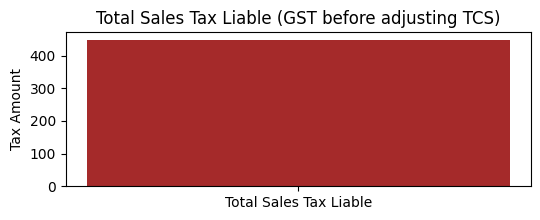

np.float64(448.71000000000004)

In [27]:
# Total Sales Tax Liable
# Calculating total sales tax liable
total_sales_tax_liable = df['Total_sales_tax_liable_GST_before_adjusting_TCS_'].sum()

plt.figure(figsize=(6, 2))
plt.bar(['Total Sales Tax Liable'], [total_sales_tax_liable], color='brown')
plt.title('Total Sales Tax Liable (GST before adjusting TCS)')
plt.ylabel('Tax Amount')
plt.show()

# Analysis
total_sales_tax_liable

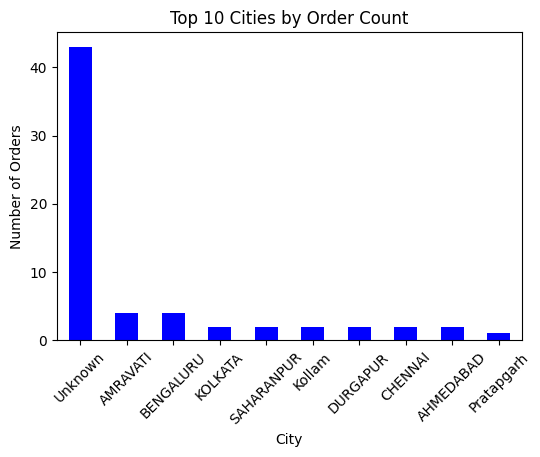

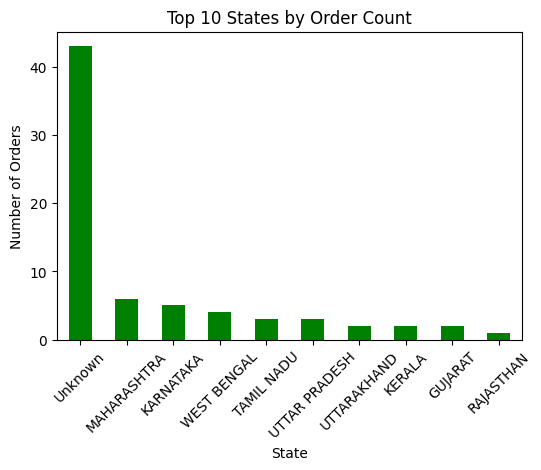

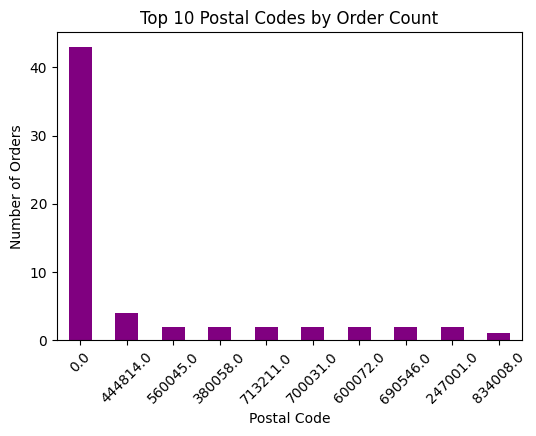

(order_city
 Unknown       43
 AMRAVATI       4
 BENGALURU      4
 KOLKATA        2
 SAHARANPUR     2
 Kollam         2
 DURGAPUR       2
 CHENNAI        2
 AHMEDABAD      2
 Pratapgarh     1
 Name: count, dtype: int64,
 order_state
 Unknown          43
 MAHARASHTRA       6
 KARNATAKA         5
 WEST BENGAL       4
 TAMIL NADU        3
 UTTAR PRADESH     3
 UTTARAKHAND       2
 KERALA            2
 GUJARAT           2
 RAJASTHAN         1
 Name: count, dtype: int64,
 order_postal
 0.0         43
 444814.0     4
 560045.0     2
 380058.0     2
 713211.0     2
 700031.0     2
 600072.0     2
 690546.0     2
 247001.0     2
 834008.0     1
 Name: count, dtype: int64)

In [29]:
# Geographic Distribution of Orders
orders_by_city = df['order_city'].value_counts().head(10)
orders_by_state = df['order_state'].value_counts().head(10)
orders_by_postal = df['order_postal'].value_counts().head(10)

# Plotting orders by city
plt.figure(figsize=(6, 4))
orders_by_city.plot(kind='bar', color='blue')
plt.title('Top 10 Cities by Order Count')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Plotting orders by state
plt.figure(figsize=(6, 4))
orders_by_state.plot(kind='bar', color='green')
plt.title('Top 10 States by Order Count')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Plotting orders by postal code
plt.figure(figsize=(6, 4))
orders_by_postal.plot(kind='bar', color='purple')
plt.title('Top 10 Postal Codes by Order Count')
plt.xlabel('Postal Code')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Analysis
orders_by_city, orders_by_state, orders_by_postal

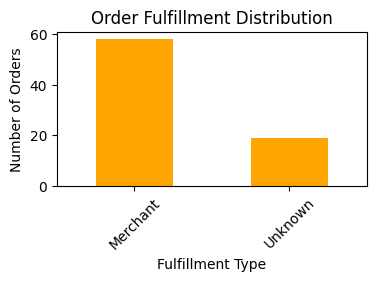

fulfillment
Merchant    58
Unknown     19
Name: count, dtype: int64

In [31]:
# Order Fulfillment Analysis
# Grouping orders by fulfillment type
fulfillment_distribution = df['fulfillment'].value_counts()

plt.figure(figsize=(4, 2))
fulfillment_distribution.plot(kind='bar', color='orange')
plt.title('Order Fulfillment Distribution')
plt.xlabel('Fulfillment Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Analysis
fulfillment_distribution

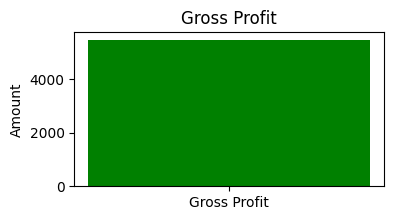

np.float64(5474.289999999999)

In [35]:
# Gross Profit
average_cost_per_unit = 100  # Replace with actual cost if known

# Calculating total cost of goods sold (COGS)
total_cogs = df['quantity'].sum() * average_cost_per_unit

# Calculating total product sales
total_sales = df['product_sales'].sum()

# Calculating gross profit
gross_profit = total_sales - total_cogs

# Plotting gross profit
plt.figure(figsize=(4, 2))
plt.bar(['Gross Profit'], [gross_profit], color='green')
plt.title('Gross Profit')
plt.ylabel('Amount')
plt.show()

# Analysis
gross_profit

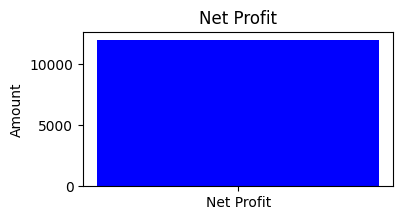

np.float64(11997.73)

In [36]:
# Net Profit
total_selling_fees = df['selling_fees'].sum()

# Calculating other costs (including FBA fees, transaction fees)
other_costs = df['fba_fees'].sum() + df['other_transaction_fees'].sum()

# Calculating net profit
net_profit = gross_profit - (total_selling_fees + other_costs)

# Plotting net profit
plt.figure(figsize=(4, 2))
plt.bar(['Net Profit'], [net_profit], color='blue')
plt.title('Net Profit')
plt.ylabel('Amount')
plt.show()

# Analysis
net_profit


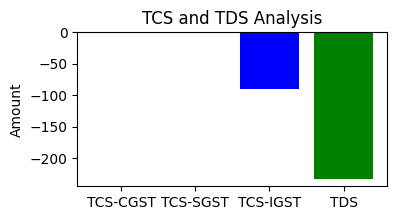

(np.float64(0.0),
 np.float64(0.0),
 np.float64(-89.73000000000002),
 np.float64(-233.26))

In [40]:
# TCS and TDS Analysis
total_tcs_cgst = df['TCS_CGST'].sum()
total_tcs_sgst = df['TCS_SGST'].sum()
total_tcs_igst = df['TCS_IGST'].sum()
total_tds = df['TDS_Section_194_O_'].sum()

# Plotting TCS and TDS
plt.figure(figsize=(4, 2))
tcs_tds_data = {
    'TCS-CGST': total_tcs_cgst,
    'TCS-SGST': total_tcs_sgst,
    'TCS-IGST': total_tcs_igst,
    'TDS': total_tds
}
plt.bar(tcs_tds_data.keys(), tcs_tds_data.values(), color=['red', 'orange', 'blue', 'green'])
plt.title('TCS and TDS Analysis')
plt.ylabel('Amount')
plt.show()

# Analysis
total_tcs_cgst, total_tcs_sgst, total_tcs_igst, total_tds